In [1]:
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
import glob
from pathlib import Path
import seaborn as sns

kaplan_plots = True
cox_analysis = False

date_time_str = '20230619_192815'
data_path = Path(os.getcwd())

if kaplan_plots:
    kmf = KaplanMeierFitter()

    csv_files = glob.glob(os.path.join(data_path, f"outputs/{date_time_str}/*.csv"))

    if not os.path.exists(f"imgs/{date_time_str}"):
        os.makedirs(f"imgs/{date_time_str}")

    # Group runs by experiment
    grouped_files = {}
    for file in csv_files:
        file_name = os.path.basename(file)
        name_without_suffix = file_name.rsplit("-", 1)[0]
        suffix = file_name.rsplit("-", 1)[1]
        group_key = name_without_suffix

        if group_key not in grouped_files:
            grouped_files[group_key] = []

        grouped_files[group_key].append(file)


    kmfs = {}
    cphs = {}

    # Print the grouped file paths
    for group_key, files in grouped_files.items():
        fig = plt.figure()
        # For computing the mean
        surv_func_ci = pd.DataFrame()
        amt_of_runs = len(files)
        
        mean_survival_plots = pd.DataFrame(columns=list("TE"))
        CPH_data = pd.DataFrame()

        for i, file_path in enumerate(files):
            data_for_CPH = pd.read_csv(file_path)
            datakf = data_for_CPH[list('TE')]
            mean_survival_plots = pd.concat([mean_survival_plots, datakf])
            CPH_data = pd.concat([CPH_data, data_for_CPH])

        kmf = KaplanMeierFitter(label=group_key)
        cphs[group_key] = CPH_data

        kmfs[group_key] = kmf.fit(mean_survival_plots["T"], mean_survival_plots['E']) # Deze line geeft die warnings, maar kon het niet oplossen nog
        kmf.plot(label='Mean')

        plt.suptitle("Kaplan-Meier survival graph", fontsize=18)
        plt.title(group_key, fontsize=10)
        plt.xlabel("Time steps")
        plt.ylabel("Survival probability")
        plt.legend()

        plt.savefig(f"imgs/{date_time_str}/km-{group_key}.png")
        plt.close()


    

c:\Users\freek\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
c:\Users\freek\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
c:\Users\freek\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.

In [2]:
# All combinations image A (for Appendix)
fig = plt.figure(figsize=(10, 10))

legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')

nr_agents = [50, 100] # [50, 100, 200, 300]
dists = ['Sides', 'Uniform', 'RandomGrid']
probs = [0.5, 0.8, 1]
i=0

for nr_agent in nr_agents:
    for dist in dists:
        for prob in probs:
            i+=1

            if i == 1:
                ax = plt.subplot(6, 3, i)
            else:
                ax = plt.subplot(6, 3, i, sharex=ax, sharey=ax)

            if dist == 'RandomGrid':
                dist_name = 'Random Blobs'
            else:
                dist_name = dist
            plt.title(f'{dist_name}, nr_agents = {nr_agent}, prob. = {prob}', fontsize=10)
            ax = kmfs[f'Baseline-no_trade-{dist}-{nr_agent}-{prob}'].plot(label='No trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Baseline-random-{dist}-{nr_agent}-{prob}'].plot(label='Random trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Baseline-pathfind_neighbor-{dist}-{nr_agent}-{prob}'].plot(label='Neighbor trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Market-pathfind_market-{dist}-{nr_agent}-{prob}'].plot(label='Market trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.94), fontsize=12)
fig.tight_layout(rect=(0.03, 0.03, 1, 0.9))
plt.subplots_adjust(wspace=0.3)
fig.text(0.5, 0.03, 'Time steps', ha='center', va='center', fontsize=14)
fig.text(0.03,  0.5, 'Survival probability', ha='center', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Kaplan-Meier survival graphs (A)", fontsize=20, y=0.98)
plt.savefig(f"imgs/{date_time_str}/kms-comparison-market-uber-A.pdf")
plt.close()


# All combinations image B (for Appendix)
fig = plt.figure(figsize=(10, 10))

legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')

nr_agents = [200, 300] # [50, 100, 200, 300]
dists = ['Sides', 'Uniform', 'RandomGrid']
probs = [0.5, 0.8, 1]
i=0

for nr_agent in nr_agents:
    for dist in dists:
        for prob in probs:
            i+=1

            if i == 1:
                ax = plt.subplot(6, 3, i)
            else:
                ax = plt.subplot(6, 3, i, sharex=ax, sharey=ax)
            
            if dist == 'RandomGrid':
                dist_name = 'Random Blobs'
            else:
                dist_name = dist
            plt.title(f'{dist_name}, nr_agents = {nr_agent}, prob. = {prob}', fontsize=10)
            ax = kmfs[f'Baseline-no_trade-{dist}-{nr_agent}-{prob}'].plot(label='No trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Baseline-random-{dist}-{nr_agent}-{prob}'].plot(label='Random trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Baseline-pathfind_neighbor-{dist}-{nr_agent}-{prob}'].plot(label='Neighbor trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Market-pathfind_market-{dist}-{nr_agent}-{prob}'].plot(label='Market trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.94), fontsize=12)
fig.tight_layout(rect=(0.03, 0.03, 1, 0.9))
plt.subplots_adjust(wspace=0.3)
fig.text(0.5, 0.03, 'Time steps', ha='center', va='center', fontsize=14)
fig.text(0.03,  0.5, 'Survival probability', ha='center', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Kaplan-Meier survival graphs (B)", fontsize=20, y=0.98)
plt.savefig(f"imgs/{date_time_str}/kms-comparison-market-uber-B.pdf")
plt.close()

C:\Users\freek\AppData\Local\Temp\ipykernel_17364\483434723.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(6, 3, i)
C:\Users\freek\AppData\Local\Temp\ipykernel_17364\483434723.py:64: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(6, 3, i)


# CPH for BLobs

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')
         T    E  Trade_random  Trade_neighbor  Trade_market
0   1000.0  1.0             0               0             0
1   1000.0  1.0             0               0             0
2   1000.0  1.0             0               0             0
3   1000.0  1.0             0               0             0
4    659.0  1.0             0               0             0
..     ...  ...           ...             ...           ...
45   214.0  1.0             0               0             1
46   192.0  1.0             0               0             1
47   555.0  1.0             0               0             1
48   184.0  1.0             0               0             1
49   169.0  1.0             0               0             1

[1000 rows x 5 columns]


<lifelines.CoxPHFitter: fitted with 1000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 1000
   partial log-likelihood = -5805.67
         time fit was run = 2023-06-21 08:49:31 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
Trade_random    -0.32       0.73       0.08            -0.47            -0.16                 0.62                 0.85
Trade_neighbor   0.75       2.12       0.08             0.59             0.91                 1.80                 2.49
Trade_market     0.80       2.22       0.09             0.63             0.96                 1.88                 2.62

                 cmp to     z      p   -log2(p)
covariate                                      
Trade_random       0.00 -3.96 <0.005      13.71
Trade_neighbor     0.00  9.01 <0.005      62.10
Trade_market       0.00  9.36 <0.005      66.81
---
Concordance = 0.50
Partial AIC = 11617.34
log-likelihood ratio test = 212.92 on 3 df
-log2(p) of ll-ratio test = 150.04

Summary dataframe:
                    coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
Trade_random   -0.315370   0.729519  0.079601       -0.471385       -0.159354   
Trade_neighbor  0.749649   2.116256  0.083185        0.586609        0.912689   
Trade_market    0.797714   2.220460  0.085197        0.630730        0.964698   

                exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                    
Trade_random               0.624137             0.852695     0.0 -3.961861   
Trade_neighbor             1.797881             2.491011     0.0  9.011807   
Trade_market               1.878982             2.623995     0.0  9.363131   

                           p   -log2(p)  
covariate                                
Trade_random    7.436786e-05  13.714961  
Trade_neighbor  2.026894e-19  62.097363  
Trade_market    

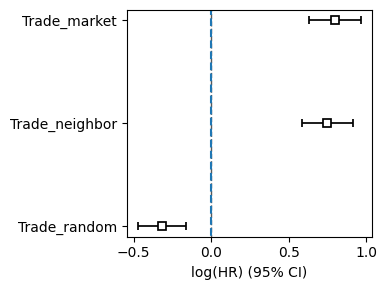

In [3]:
cox_analysis = True

if cox_analysis:
    combined_df = pd.concat([cphs['Baseline-no_trade-RandomGrid-50-0.8'],
                             cphs['Baseline-random-RandomGrid-50-0.8'],
                             cphs['Baseline-pathfind_neighbor-RandomGrid-50-0.8'],
                             cphs['Market-pathfind_market-RandomGrid-50-0.8'],
    ])

    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Num_agents', 'Distribution', 'Move_prob', 'Trading', 'Agent_type', 'Scenario'], axis=1)

    print( combined_df)
    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-RG-50-0.8-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph.print_summary()
    print("Summary dataframe:")
    cph_df = cph.summary
    print(cph_df)
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-RG-50-0.8-results.csv")

    plt.figure(figsize=(4, 3))
    cph.plot()
    plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
    plt.tight_layout()
    plt.show()

# CPH for Sides

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')
        T    E  Trade_random  Trade_neighbor  Trade_market
0   116.0  1.0             0               0             0
1   122.0  1.0             0               0             0
2   183.0  1.0             0               0             0
3   124.0  1.0             0               0             0
4   139.0  1.0             0               0             0
..    ...  ...           ...             ...           ...
45  166.0  1.0             0               0             1
46  226.0  1.0             0               0             1
47  200.0  1.0             0               0             1
48  116.0  1.0             0               0             1
49  183.0  1.0             0               0             1

[1000 rows x 5 columns]


<lifelines.CoxPHFitter: fitted with 1000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 1000
   partial log-likelihood = -5835.13
         time fit was run = 2023-06-21 08:49:33 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
Trade_random    -0.07       0.93       0.08            -0.23             0.09                 0.79                 1.10
Trade_neighbor  -0.12       0.89       0.08            -0.28             0.04                 0.76                 1.05
Trade_market    -0.96       0.38       0.09            -1.13            -0.78                 0.32                 0.46

                 cmp to      z      p   -log2(p)
covariate                                       
Trade_random       0.00  -0.85   0.40       1.33
Trade_neighbor     0.00  -1.41   0.16       2.67
Trade_market       0.00 -10.85 <0.005      88.66
---
Concordance = 0.50
Partial AIC = 11676.26
log-likelihood ratio test = 153.99 on 3 df
-log2(p) of ll-ratio test = 107.77

Summary dataframe:
                    coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
Trade_random   -0.069726   0.932649  0.082406       -0.231239        0.091787   
Trade_neighbor -0.116726   0.889829  0.082498       -0.278419        0.044966   
Trade_market   -0.956611   0.384193  0.088186       -1.129452       -0.783770   

                exp(coef) lower 95%  exp(coef) upper 95%  cmp to          z  \
covariate                                                                     
Trade_random                0.79355             1.096131     0.0  -0.846129   
Trade_neighbor              0.75698             1.045993     0.0  -1.414903   
Trade_market                0.32321             0.456681     0.0 -10.847655   

                           p   -log2(p)  
covariate                                
Trade_random    3.974808e-01   1.331043  
Trade_neighbor  1.570969e-01   2.670274  
Trade_marke

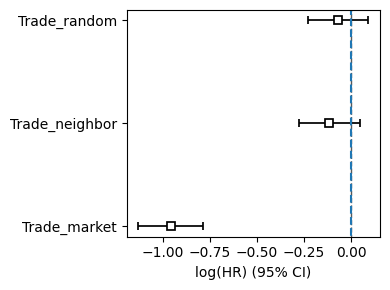

In [4]:



cox_analysis = True

if cox_analysis:
    combined_df = pd.concat([cphs[f'Baseline-no_trade-Sides-50-1'],
                             cphs[f'Baseline-random-Sides-50-1'],
                             cphs[f'Baseline-pathfind_neighbor-Sides-50-1'],
                             cphs[f'Market-pathfind_market-Sides-50-1'],
    ])

    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Num_agents', 'Distribution', 'Move_prob', 'Trading', 'Agent_type', 'Scenario'], axis=1)

    print( combined_df)
    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph.print_summary()
    print("Summary dataframe:")
    cph_df = cph.summary
    print(cph_df)
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-results.csv")

    plt.figure(figsize=(4, 3))
    cph.plot()
    plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
    plt.tight_layout()
    plt.show()

# CPH Sides threshold of significance market (varying nr agents)

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')


<lifelines.CoxPHFitter: fitted with 1000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 1000
   partial log-likelihood = -5847.17
         time fit was run = 2023-06-21 08:49:34 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
Trade_random    -0.08       0.93       0.08            -0.24             0.08                 0.79                 1.09
Trade_neighbor   0.04       1.04       0.08            -0.13             0.20                 0.88                 1.22
Trade_market    -0.85       0.43       0.09            -1.02            -0.67                 0.36                 0.51

                 cmp to     z      p   -log2(p)
covariate                                      
Trade_random       0.00 -0.94   0.35       1.53
Trade_neighbor     0.00  0.43   0.67       0.58
Trade_market       0.00 -9.52 <0.005      69.03
---
Concordance = 0.50
Partial AIC = 11700.33
log-likelihood ratio test = 129.92 on 3 df
-log2(p) of ll-ratio test = 90.52

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')


<lifelines.CoxPHFitter: fitted with 2000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 2000
number of events observed = 2000
   partial log-likelihood = -13144.68
         time fit was run = 2023-06-21 08:49:37 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
Trade_random    -0.14       0.87       0.06            -0.25            -0.03                 0.78                 0.97
Trade_neighbor   0.06       1.06       0.06            -0.06             0.17                 0.94                 1.19
Trade_market    -0.56       0.57       0.06            -0.68            -0.45                 0.51                 0.64

                 cmp to     z      p   -log2(p)
covariate                                      
Trade_random       0.00 -2.41   0.02       5.96
Trade_neighbor     0.00  0.97   0.33       1.60
Trade_market       0.00 -9.36 <0.005      66.73
---
Concordance = 0.50
Partial AIC = 26295.37
log-likelihood ratio test = 123.68 on 3 df
-log2(p) of ll-ratio test = 86.06

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')


<lifelines.CoxPHFitter: fitted with 4000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 4000
number of events observed = 4000
   partial log-likelihood = -29117.66
         time fit was run = 2023-06-21 08:49:41 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
Trade_random    -0.06       0.94       0.04            -0.14             0.02                 0.87                 1.02
Trade_neighbor   0.04       1.04       0.04            -0.04             0.12                 0.96                 1.13
Trade_market    -0.39       0.68       0.04            -0.47            -0.31                 0.62                 0.73

                 cmp to     z      p   -log2(p)
covariate                                      
Trade_random       0.00 -1.52   0.13       2.95
Trade_neighbor     0.00  1.01   0.31       1.68
Trade_market       0.00 -9.42 <0.005      67.60
---
Concordance = 0.50
Partial AIC = 58241.31
log-likelihood ratio test = 127.21 on 3 df
-log2(p) of ll-ratio test = 88.59

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')


<lifelines.CoxPHFitter: fitted with 6000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 6000
number of events observed = 6000
   partial log-likelihood = -46181.48
         time fit was run = 2023-06-21 08:49:48 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
Trade_random    -0.09       0.91       0.03            -0.16            -0.03                 0.85                 0.97
Trade_neighbor  -0.02       0.98       0.03            -0.08             0.05                 0.92                 1.05
Trade_market    -0.20       0.82       0.03            -0.26            -0.13                 0.77                 0.87

                 cmp to     z      p   -log2(p)
covariate                                      
Trade_random       0.00 -2.78   0.01       7.53
Trade_neighbor     0.00 -0.56   0.58       0.80
Trade_market       0.00 -5.95 <0.005      28.46
---
Concordance = 0.50
Partial AIC = 92368.95
log-likelihood ratio test = 41.76 on 3 df
-log2(p) of ll-ratio test = 27.73

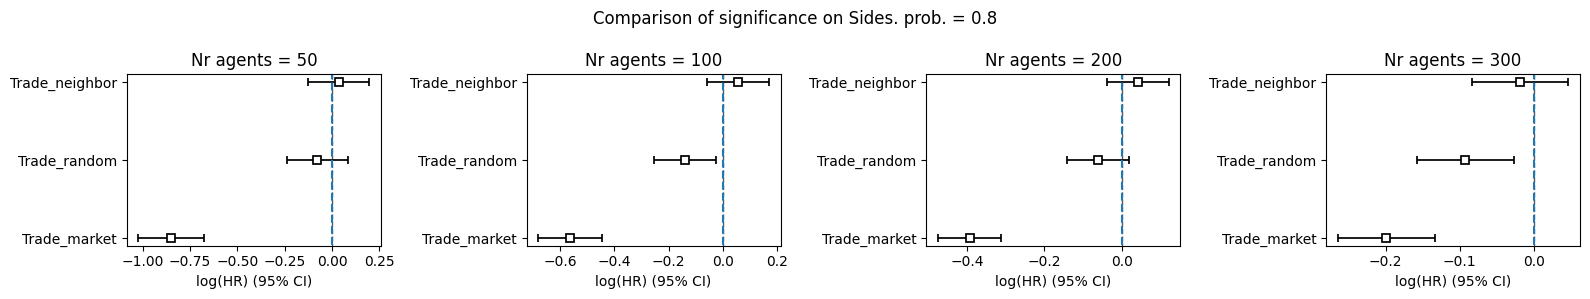

In [5]:
cox_analysis = True

nagentsss = [50, 100, 200, 300]

plt.figure(figsize=(16,3))

for i, n_agents in enumerate(nagentsss):
    if i > 0:
        ax = plt.subplot(1, 4, i+1, sharey=ax)
    else:
        ax = plt.subplot(1, 4, i+1)
    combined_df = pd.concat([cphs[f'Baseline-no_trade-Sides-{n_agents}-0.8'],
                             cphs[f'Baseline-random-Sides-{n_agents}-0.8'],
                             cphs[f'Baseline-pathfind_neighbor-Sides-{n_agents}-0.8'],
                             cphs[f'Market-pathfind_market-Sides-{n_agents}-0.8'],
    ])
    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Num_agents', 'Distribution', 'Move_prob', 'Trading', 'Agent_type', 'Scenario'], axis=1)

    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-{n_agents}-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-{n_agents}-results.csv")
    cph.print_summary()

    cph.plot()
    plt.title(f'Nr agents = {n_agents}')
    plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
    plt.tight_layout()
    plt.suptitle('Comparison of significance on Sides. prob. = 0.8')
    
plt.show()

# CPH for Uniform

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')
          T    E  Trade_random  Trade_neighbor  Trade_market
0     313.0  1.0             0               0             0
1     281.0  1.0             0               0             0
2    1000.0  1.0             0               0             0
3     317.0  1.0             0               0             0
4     372.0  1.0             0               0             0
..      ...  ...           ...             ...           ...
295   229.0  1.0             0               0             1
296  1000.0  1.0             0               0             1
297   255.0  1.0             0               0             1
298   187.0  1.0             0               0             1
299   312.0  1.0             0               0             1

[6000 rows x 5 columns]

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a momen

<lifelines.CoxPHFitter: fitted with 6000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 6000
number of events observed = 6000
   partial log-likelihood = -46199.75
         time fit was run = 2023-06-21 09:48:58 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
Trade_random    -0.00       1.00       0.03            -0.07             0.06                 0.94                 1.07
Trade_neighbor  -0.01       0.99       0.03            -0.08             0.05                 0.92                 1.05
Trade_market    -0.07       0.93       0.03            -0.13            -0.00                 0.88                 1.00

                 cmp to     z    p   -log2(p)
covariate                                    
Trade_random       0.00 -0.05 0.96       0.06
Trade_neighbor     0.00 -0.41 0.69       0.55
Trade_market       0.00 -2.05 0.04       4.64
---
Concordance = 0.50
Partial AIC = 92405.50
log-likelihood ratio test = 5.22 on 3 df
-log2(p) of ll-ratio test = 2.67

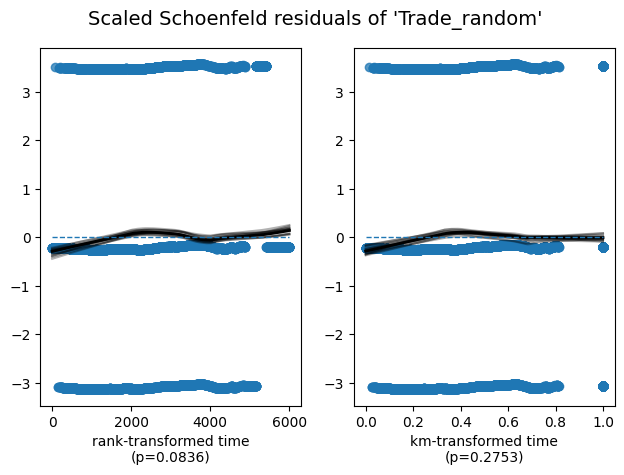

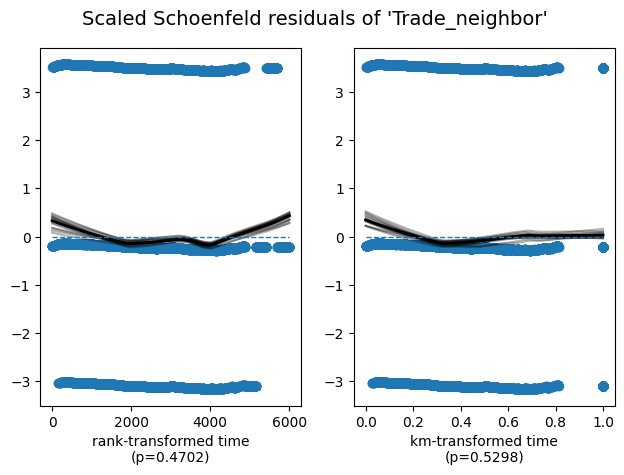

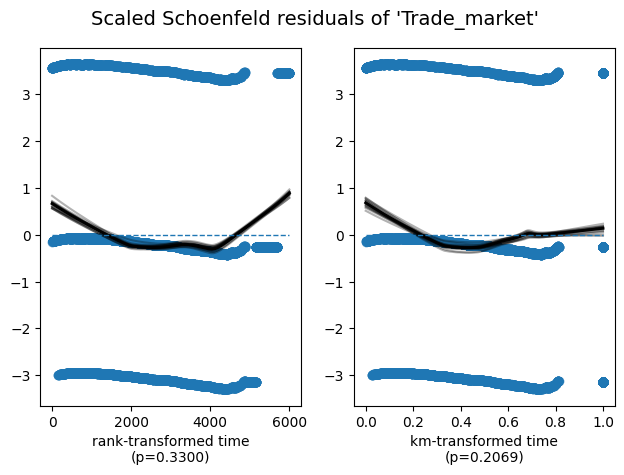

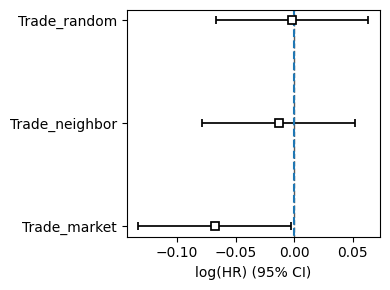

In [13]:
cox_analysis = True

if cox_analysis:
    combined_df = pd.concat([cphs[f'Baseline-no_trade-Uniform-300-0.8'],
                             cphs[f'Baseline-random-Uniform-300-0.8'],
                             cphs[f'Baseline-pathfind_neighbor-Uniform-300-0.8'],
                             cphs[f'Market-pathfind_market-Uniform-300-0.8'],
    ])

    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Num_agents', 'Distribution', 'Move_prob', 'Trading', 'Agent_type', 'Scenario'], axis=1)

    print( combined_df)
    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph.check_assumptions(combined_df.reset_index(drop=True), p_value_threshold=0.05, show_plots=True)


    cph.print_summary()
    cph_df = cph.summary
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-results.csv")

    plt.figure(figsize=(4, 3))
    cph.plot()
    plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
    plt.tight_layout()
    plt.show()

# CPH for all data

In [6]:
cox_analysis = True

if cox_analysis:
    # Analysis
    def concatAllRuns(data_path: Path):
        csv_files = glob.glob(os.path.join(data_path, f"outputs/{date_time_str}/*.csv"))
        combined_df = pd.concat([pd.read_csv(f) for f in csv_files])
        return combined_df


    combined_df = concatAllRuns(data_path)

    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_neighbor"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Trading', 'Agent_type', 'Scenario'], axis=1)

    print( combined_df)
    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-RG-50-0.8-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph.print_summary()
    print("Summary dataframe:")
    cph_df = cph.summary
    print(cph_df)
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-results-all.csv")

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')
         T    E  Distribution  Num_agents  Move_prob  Trade_random  \
0    242.0  1.0             0         100        0.5             0   
1   1000.0  1.0             0         100        0.5             0   
2    577.0  1.0             0         100        0.5             0   
3   1000.0  1.0             0         100        0.5             0   
4    137.0  1.0             0         100        0.5             0   
..     ...  ...           ...         ...        ...           ...   
45  1000.0  1.0             2          50        1.0             0   
46  1000.0  1.0             2          50        1.0             0   
47  1000.0  1.0             2          50        1.0             0   
48  1000.0  1.0             2          50        1.0             0   
49  1000.0  1.0             2          50        1.0             0   

    Trade_neighbor

<lifelines.CoxPHFitter: fitted with 117000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 117000
number of events observed = 117000
   partial log-likelihood = -1235196.19
         time fit was run = 2023-06-21 08:51:58 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
Distribution    -0.42       0.66       0.00            -0.43            -0.41                 0.65                 0.66
Num_agents       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Move_prob       -0.39       0.68       0.01            -0.41            -0.36                 0.66                 0.70
Trade_random    -0.16       0.85       0.01            -0.18            -0.15                 0.84                 0.86
Trade_neighbor   0.18       1.20       0.01             0.17             0.20                 1.18                 1.22
Trade_market     0.10       1.10       0.01             0.08             0.11                 1.09                 1.12

                 cmp to       z      p   -log2(p)
covariate                                        
Distribution       0.00 -133.24 <0.005        inf
Num_agents         0.00   96.76 <0.005        inf
Move_prob          0.00  -28.33 <0.005     584.25
Trade_random       0.00  -21.73 <0.005     345.33
Trade_neighbor     0.00   24.25 <0.005     429.07
Trade_market       0.00   13.21 <0.005     129.90
---
Concordance = 0.50
Partial AIC = 2470404.37
log-likelihood ratio test = 26384.57 on 6 df
-log2(p) of ll-ratio test = inf

Summary dataframe:
                    coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
Distribution   -0.419458   0.657403  0.003148       -0.425628       -0.413288   
Num_agents      0.003215   1.003220  0.000033        0.003150        0.003280   
Move_prob      -0.387728   0.678597  0.013684       -0.414549       -0.360908   
Trade_random   -0.162668   0.849873  0.007486       -0.177341       -0.147995   
Trade_neighbor  0.183266   1.201134  0.007558        0.168453        0.198079   
Trade_market    0.099538   1.104661  0.007536        0.084767        0.114309   

                exp(coef) lower 95%  exp(coef) upper 95%  cmp to           z  \
covariate                                                                      
Distribution               0.653359             0.661472     0.0 -133.238206   
Num_agents                 1.003155             1.003286     0.0   96.759996   
Move_prob   

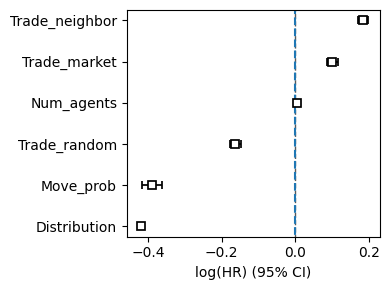

In [7]:
plt.figure(figsize=(4, 3))
cph.plot()
plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
plt.tight_layout()
plt.show()